In [32]:
using Revise
using Laconic
using Laconic.Atom
using Laconic.Symbolic
using Laconic.Gaussian
using Laconic.SystemM
using Laconic.DisplayM

In [3]:
cgbfs = []
for ind=1:10
    push!(cgbfs, ContractedGaussianBasisFunction((0,), (0.,), (ind / 10, 1.0,)))
end
basis = GaussianBasis(tuple(cgbfs...))
basiscombined = kron(basis, basis);

In [59]:
numparticles = 3
builder = IdenticalParticleBuilder(Float64, numparticles, 10, -1)
state = build(builder)
setcoeff!(state, (1,4,7), 1.0)
statevec = asvector(state);

In [64]:
kin1 = kron(kineticenergyoperator(basis), identity(basis), identity(basis))
kin2 = kron(identity(basis), kineticenergyoperator(basis), identity(basis))
kin3 = kron(identity(basis), identity(basis), kineticenergyoperator(basis))
nuc1 = kron(nuclearattractionoperator(basis, (0.,)), identity(basis), identity(basis))
nuc2 = kron(identity(basis), nuclearattractionoperator(basis, (0.,)), identity(basis))
nuc3 = kron(identity(basis), identity(basis), nuclearattractionoperator(basis, (0.,)))
basiscombined = kron(basis, basis, basis)
repulsion = coulomboperator(basiscombined)
hamiltonian = kin1 + kin2 + kin3 + nuc1 + nuc2 + nuc3; # + repulsion;
size(repulsion.matrix)

MethodError: MethodError: no method matching coulomboperator(::CombinedBasis{Tuple{CombinedBasis{Tuple{GaussianBasis{10,1},GaussianBasis{10,1}}},GaussianBasis{10,1}}})
Closest candidates are:
  coulomboperator(!Matched::CombinedBasis{Tuple{GaussianBasis{M1,N},GaussianBasis{M2,N}}}) where {M1, M2, N} at /home/david/workspace/laconic/src/gaussian.jl:640
  coulomboperator(!Matched::CombinedBasis{Tuple{GaussianBasis{M1,N},GaussianBasis{M2,N}}}, !Matched::Any) where {M1, M2, N} at /home/david/workspace/laconic/src/gaussian.jl:640

In [41]:
hamiltonian_mat = Array{Float64,2}(hamiltonian.matrix)
psi0 = Array{ComplexF64}(statevec)
tspan = (0., 30.)
soln = solve_system(hamiltonian_mat, basiscombined, psi0, tspan)

TimeDependentSolution{CombinedBasis{Tuple{GaussianBasis{10,1},GaussianBasis{10,1}}}}([0.0, 0.0008765015946664715, 0.006573627412773781, 0.040547116396543265, 0.19374098728565842, 0.44113617955311, 0.7396533933230012, 1.0641344149606704, 1.4161833637553989, 1.8070491299530413  …  25.471773937107997, 26.00875755638678, 26.54681663141778, 27.0775405192971, 27.613695318739058, 28.158519147291425, 28.700868429773717, 29.237734258398934, 29.775332398536886, 30.0], Complex{Float64}[0.0 + 0.0im -1.0542879615426205e-23 - 1.4261260815172639e-21im … 7.498074485782476e-17 - 3.554282736541833e-16im 6.896126858207632e-17 - 3.6563550764041037e-16im; 0.0 + 0.0im 4.571014976584719e-8 - 0.00030201259133446885im … -0.2628397544583992 - 0.05091412854976893im -0.2183896942866133 - 0.09262730379121248im; … ; 0.0 + 0.0im -9.491329435927948e-9 + 6.928188026068625e-12im … -0.012740406987680216 + 0.05944810707940918im 0.004155202466953117 + 0.06170591137391482im; 0.0 + 0.0im 2.0867714267415474e-25 + 6.004546571

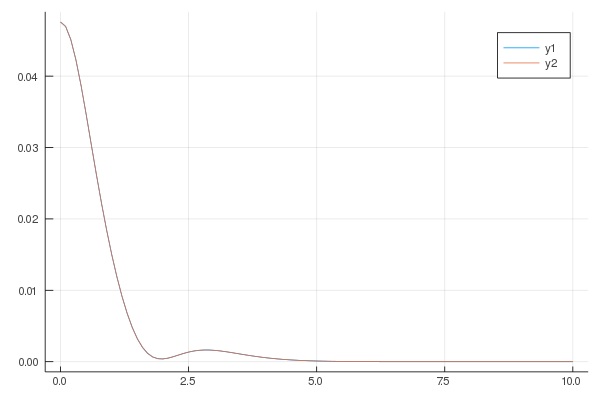

In [76]:
x = Variable("x")
sym=symbolic(basis, 1, x)
sym 
evalexpr(sym, x, [1., 2.])
plotattime(soln, 30., xrange)
# soln.odesol(0.0
# xrange = 0:.1:10
# using Plots
# combineterms(symbolic(soln, 2, 0., x))

In [54]:
combineterms(symbolic(soln, 1, 5., x))

0.1267389463354385*(1.0^2)*(1.2482333292982964e-17 + 3.699695423523433e-17im)*exp(-0.1*(x^2))+(-0.09706641756755348 - 0.03096178945616372im)*0.21314865129300628*(1.0^2)*exp(-0.2*(x^2))+(-0.05532397199367804 - 0.04425615680301287im)*0.2889023225626449*(1.0^2)*exp(-0.3*(x^2))+(0.013743635446703019 - 0.07894601344421287im)*0.35847187357690596*1.0*1.0000000000000002*exp(-0.4*(x^2))+(0.022096237098460484 + 0.09898204751923725im)*0.4237772081237576*1.0*1.0000000000000002*exp(-0.5*(x^2))+(0.03170054507603545 - 0.09763112732943063im)*0.4858738548028009*(1.0^2)*exp(-0.6*(x^2))+(-0.011272314034288283 - 0.06350316215670772im)*0.5454232190718755*(1.0^2)*exp(-0.7*(x^2))+(-0.026694995759900877 - 0.013383408876113594im)*0.602875426920206*(1.0^2)*exp(-0.8*(x^2))+(-0.027821321786927696 + 0.032184575824693286im)*0.6585548830521745*1.0*1.0000000000000002*exp(-0.9*(x^2))+(-0.028327851314380405 + 0.059491727162995514im)*0.7127054703549902*(1.0^2)*exp(-1.0*(x^2))+(0.09706641756755349 + 0.03096178945616373im

In [53]:
getcoeff(state, (5,1))

-1.0